In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
data = pd.read_csv("./data.csv")
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1693,35.201705,192.168.15.4,192.168.15.3,MQTT,90,Connect Command
1,1694,35.201895,192.168.15.4,192.168.15.3,MQTT,68,Disconnect Req
2,1699,35.204415,192.168.15.4,192.168.15.3,MQTT,90,Connect Command
3,1700,35.204650,192.168.15.3,192.168.15.4,MQTT,70,Connect Ack
4,1705,35.206724,192.168.15.4,192.168.15.3,MQTT,348,Publish Message (id=1) [Deviceb'Device - 1']
...,...,...,...,...,...,...,...
33203,664050,6751.207212,192.168.15.4,192.168.15.3,MQTT,90,Connect Command
33204,664052,6751.210066,192.168.15.4,192.168.15.3,MQTT,348,Publish Message (id=6641) [Deviceb'Device - 1']
33205,664054,6751.214445,192.168.15.3,192.168.15.4,MQTT,70,Connect Ack
33206,664056,6751.216880,192.168.15.3,192.168.15.4,MQTT,70,Publish Ack (id=6641)


In [3]:
array_publish = []
array_publish_ack = []

for i in range(len(data)):
    if re.search("Publish Message", data.loc[i, "Info"]):
        array_publish.append(i)
    if re.search("Publish Ack ", data.loc[i, "Info"]):
        array_publish_ack.append(i)


In [4]:
RTT = pd.DataFrame(columns=["Time_publish", "Time_ack"])
for i in array_publish:
    init = re.search("id=", data.loc[i, "Info"]).span()[1]
    end = re.search("\)", data.loc[i, "Info"]).span()[0]
    index = data.loc[i, "Info"][init:end]
    RTT.loc[index,"Time_publish"]  = float(data.loc[i, "Time"])
    

for i in array_publish_ack:
    init = re.search("id=", data.loc[i, "Info"]).span()[1]
    end = re.search("\)", data.loc[i, "Info"]).span()[0]
    index = data.loc[i, "Info"][init:end]
    RTT.loc[index,"Time_ack"]  = float(data.loc[i, "Time"])


In [5]:
RTT["RTT"]  =(RTT["Time_ack"] - RTT["Time_publish"] )* 1000

In [6]:
RTT.head(5)

,Time_publish,Time_ack,RTT
1,35.206724,35.209773,3.048943
2,36.218997,36.221906,2.90885
3,37.229133,37.231917,2.783984
4,38.240397,38.243279,2.881788
5,39.250771,39.253693,2.921664


In [7]:
print("média = {}".format(RTT["RTT"].mean()))
print("mediana = {}".format(RTT["RTT"].median()))
print("máximo = {}".format(RTT["RTT"].max()))
print("minimo = {}".format(RTT["RTT"].min()))
print("25% = {}".format(RTT["RTT"].quantile(0.25)))
print("50% = {}".format(RTT["RTT"].quantile()))
print("75% = {}".format(RTT["RTT"].quantile(0.75)))
print("90% = {}".format(RTT["RTT"].quantile(0.90)))
print("95% = {}".format(RTT["RTT"].quantile(0.95)))
print("99% = {}".format(RTT["RTT"].quantile(0.99)))
print("std = {}".format(RTT["RTT"].std()))

média = 3.6595804776401164
mediana = 2.8864999999314023
máximo = 59.02505300036864
minimo = 1.5625550004187971
25% = 2.7916399999412533
50% = 2.8864999999314023
75% = 3.1730900000184192
90% = 6.754310000133046
95% = 6.827639000221097
99% = 8.05279339965637
std = 1.8611073089508667


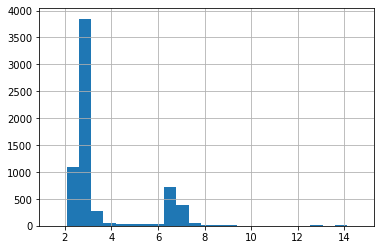

In [8]:
RTT["RTT"].loc[RTT["RTT"]>=8]
fig, ax=plt.subplots()
ax.hist(x=RTT["RTT"].loc[RTT["RTT"]<=14.799397240020642], bins=25)
ax.grid();

In [9]:
RTT

,Time_publish,Time_ack,RTT
1,35.206724,35.209773,3.048943
2,36.218997,36.221906,2.90885
3,37.229133,37.231917,2.783984
4,38.240397,38.243279,2.881788
5,39.250771,39.253693,2.921664
...,...,...,...
6637,6747.16881,6747.171625,2.815156
6638,6748.178686,6748.18149,2.803713
6639,6749.188697,6749.191841,3.143763
6640,6750.199601,6750.202468,2.866754
